In [1]:
import os
import sklearn.datasets as skd

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

#categories = ['alt.atheism', 'soc.religion.christian','comp.graphics', 'sci.med']
#news_test = skd.load_files('C:/Users/laptop/Desktop/BEUTH/SEMESTER2/Workflow/20news-bydate-test', categories= categories, encoding= 'ISO-8859-1')
#news_train = skd.load_files('C:/Users/laptop/Desktop/BEUTH/SEMESTER2/Workflow/20news-bydate-train',categories= categories, encoding= 'ISO-8859-1')

print(os.getcwd())

/Users/silke/Documents/studiumDataScience/semester2/DSW/Biesmann/newsreader/dsw/ml-task


In [32]:
import re

def preprocessing_02 (text):
    #print(text)
    a = text.lower() # lower cases only
    #remove non-ascii and digits
    b = re.sub("(\\W|\\d)"," ",a)
    blob = TextBlobDE(b)
    return(blob.words.lemmatize()) # lemmatize for german

In [39]:
print(preprocessing_02(str("Gegorene Banane ist mein ! ß # ' in Berlin geboren Lieblingsessen. 55 ä Ümnla")))

['gegor', 'banane', 'sein', 'mein', 'ss', 'in', 'berlin', 'gebären', 'lieblingsessen', 'ä', 'ümnla']


In [46]:
import os
import glob
import pandas as pd
from textblob_de import TextBlobDE

#print(glob.glob("tagesspiegel-2020-07-07/*.txt")[0:10])
file_list = glob.glob("../tagesspiegel/*.txt")

n = len(file_list)
print(n , "files to work with.")

list_of_articles = []

for i in range(40):
    with open (file_list[i]) as file:
        text=file.read()
        #preprocessing: lower cases and lemmatizing
        list_of_articles.append(str(preprocessing_02(text)))

        
#list_of_articles

646 files to work with.


In [48]:
list_of_articles[1]

"['fasen', 'vergessene', 'milliarden', 'bund', 'ignoriert', 'klimaschutz', 'bei', 'geldanlagen', 'der', 'abzugen', 'von', 'investitionen', 'aus', 'fossilen', 'brennstoffen', 'gehören', 'zu', 'den', 'topthemen', 'des', 'weltwirtschaftsforums', 'in', 'davos', 'und', 'offiziell', 'auch', 'zu', 'den', 'zielen', 'der', 'bundesregierung', 'das', 'bundesfinanzministerium', 'bmf', 'etwaten', 'wollen', 'deutschland', 'zum', 'führend', 'standort', 'für', 'nachhaltige', 'finanzen', 'machen', 'doch', 'für', 'eigen', 'investitionen', 'fehlen', 'bundesfinanzminister', 'olaf', 'scholz', 'spd', 'konkret', 'klimaschutzleitplanken', 'selbst', 'die', 'mitarbeiter', 'im', 'finanzministerium', 'wissen', 'nämlich', 'nicht', 'welche', 'summen', 'die', 'versorgungsanstalt', 'des', 'bundes', 'und', 'der', 'länder', 'vbl', 'überhaupen', 'in', 'klimaschädlich', 'unternehmen', 'gesteckt', 'haben', 'tagesspiegel', 'background', 'energie', 'klima', 'kohleausstieg', 'klimawandel', 'sektorkopplung', 'das', 'briefing'

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

text_cluster = Pipeline([('vect', CountVectorizer(list_of_articles, max_df=0.8 , min_df = 5)), 
                      ('cluster', KMeans(init='k-means++', n_clusters=5, n_init=10)) ])

# there is an option 'preprocessor' for the count vectoriser.
# I could do the to lower and lemmatizing here.

# train the model
text_cluster.fit(list_of_articles)

# How can I access the CountVectoriser? When I defined a CountVectoriser cv I could do
#print(cv.stop_words_)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input=["['wir', 'haben', 'solch', 'angst', "
                                        "'warum', 'die', 'hongkong', "
                                        "'revolution', 'in', 'göttingen', "
                                        "'weitergehen', 'er', 'wirkt', "
                                        "'angespannt', 'müd', 'nervös', 'er', "
                                        "'sprechen', 'leis', 'und', "
                                        "'manchmal', 'n...
                                 lowercase=True, max_df=0.8, max_features=None,
                                 min_df=5, ngram_range=(1, 1),
                                 preprocessor=None, stop_words=None,
                                 s

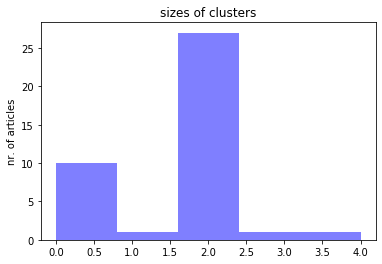

In [51]:
import matplotlib.pyplot as plt

pred = text_cluster.predict(list_of_articles)

num_bins = 5
n, bins, patches = plt.hist(pred, num_bins, facecolor='blue', alpha=0.5)
plt.title('sizes of clusters')
plt.ylabel('nr. of articles')
plt.show()

Set parameters in a smart way.
number of clusters -> knee / elbow
max_df and min_df
there are decision rules for this?
over all Distance (from the clusters center)

In [53]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html?highlight=preprocessing
reduced_data = PCA(n_components=2).fit_transform(list_of_articles)
#kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
#kmeans.fit(reduced_data)

NameError: name 'PCA' is not defined

In [4]:
# https://kavita-ganesan.com/how-to-use-countvectorizer/
from sklearn.feature_extraction.text import CountVectorizer

# base case, use default arguments
cv = CountVectorizer(list_of_articles)
count_vector=cv.fit_transform(list_of_articles)
count_vector

<3x764 sparse matrix of type '<class 'numpy.int64'>'
	with 895 stored elements in Compressed Sparse Row format>

In [56]:
# remove words that appear in 0.5 of the documents
cv = CountVectorizer(list_of_articles, max_df=0.5)
count_vector=cv.fit_transform(list_of_articles)
count_vector
len(cv.stop_words_) # how many words have been removed?


68

In [6]:
cv = CountVectorizer(list_of_articles, max_features=500)
#cv = CountVectorizer(list_of_articles, max_df=0.8, min_df=1)
count_vector=cv.fit_transform(list_of_articles)
count_vector
len(cv.stop_words_) # how many words have been removed

264

In [58]:
count_vector

<3x61 sparse matrix of type '<class 'numpy.int64'>'
	with 122 stored elements in Compressed Sparse Row format>

In [66]:
# https://pypi.org/project/textblob-de/
pip install textblob-de

     |████████████████████████████████| 471kB 676kB/s eta 0:00:01
     |████████████████████████████████| 645kB 857kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
from textblob_de import TextBlobDE as TextBlob
blob = TextBlob(list_of_articles[1])
blob.words.lemmatize()

WordList(['hinter', 'dem', 'Ferrari-Mundschutz', 'suchte', 'Sebastian', 'Vettel', 'verbittert', 'nach', 'Erklärungen', 'für', 'seinen', 'desaströs', 'Fehlstart', 'in', 'die', 'Formel-1-Notsaison', 'Weit', 'abhängen', 'haben', 'sich', 'der', '33-jährige', 'mit', 'ein', 'Anfängerfehler', 'am', 'Sonntag', 'in', 'Österreich', 'das', 'Rennen', 'komplett', 'zerstören', 'und', 'war', 'gerade', 'noch', 'als', 'Zehnter', 'von', 'elf', 'Fahrern', 'ins', 'Ziel', 'rollen', '„', 'Es', 'sein', 'irgendwo', 'der', 'Wurm', 'drin', '“', 'klagte', 'Vettel', '–', 'und', 'das', 'sein', 'noch', 'ein', 'Untertreibung', 'Beim', 'überlegen', 'Sieg', 'von', 'Mercedes-Pilot', 'Valtteri', 'Bottas', 'im', 'am', 'Ende', 'spektakulär', 'Geister-Grand-Prix', 'in', 'Spielberg', 'glich', 'Vettels', 'Auftritt', 'ein', 'Debakel', '„', 'Ich', 'haben', 'unheimlich', 'Probleme', 'auf', 'der', 'Strecke', 'zu', 'bleiben', 'Ich', 'haben', 'das', 'Auto', 'nicht', 'wiedererkannt', 'es', 'sein', 'ganz', 'schw', 'zu', 'fahren', '“

In [ ]:
# https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
# count vectoriser with n-gram model
# Convert a collection of text documents to a matrix of token counts

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
# use pipeline

In [ ]:
# https://queirozf.com/entries/scikit-learn-pipeline-examples
# examples

In [ ]:
# https://stackoverflow.com/questions/33091376/python-what-is-exactly-sklearn-pipeline-pipeline
# a discussion